In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Part 2 - Predict Salary hike

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


High positive correlation between the two variables

### Training the model

In [4]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience', data = data).fit()

### Checking the R-Squared value

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        12:38:46   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-------------------
R-squared value is way more than the general target value which is 0.75. The model's r-squared value is 0.957

### Making predictions and calculating the RMSE value

In [6]:
pred = model.predict(data['YearsExperience'])
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [7]:
# All the errors in the predictions
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [8]:
# Total error can be calculated using the rmse value - it should be less.
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(data['Salary'], pred))
rmse

5592.043608760662

Text(0, 0.5, 'Salary')

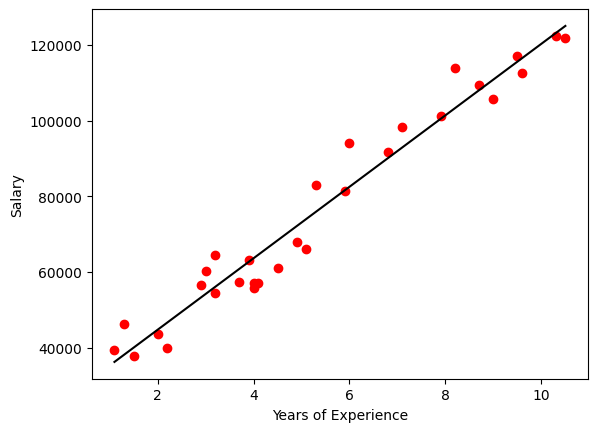

In [9]:
plt.scatter(data['YearsExperience'], data['Salary'], color = 'red')
plt.plot(data['YearsExperience'], pred, color = 'black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Further improvement to the r-squared value is not needed. But we can check if any improvements can be made

### Applying transformations to the data to improve r^2
1. Log transformations
2. exponential
3. sqrt
4. square

### Log transformation
y = B0 + B1 * X

In [10]:
model2 = smf.ols('Salary~np.log(YearsExperience)', data = data).fit()

In [11]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           3.25e-13
Time:                        12:38:47   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-------------------
**Decreased r-squared value of 0.854. Decrease in the performance of the model**

In [12]:
pred2 = model2.predict(data['YearsExperience'])

In [13]:
rmse2 = np.sqrt(mean_squared_error(data['YearsExperience'], pred2))
rmse2

79974.15496099806

Text(0, 0.5, 'Salary')

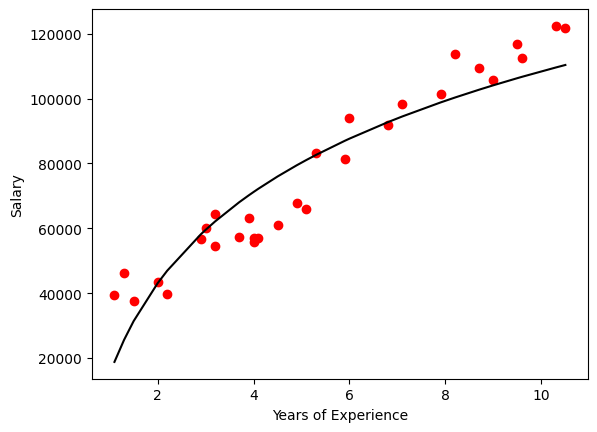

In [14]:
plt.scatter(data['YearsExperience'], data['Salary'], color = 'red')
plt.plot(data['YearsExperience'], pred2, color = 'black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

### Exponential model
y = e^(B0 + B1 * X)

or

log(y) = B0 + B1 * X

In [15]:
model3 = smf.ols('np.log(Salary)~YearsExperience', data = data).fit()

In [16]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           7.03e-18
Time:                        12:38:47   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-------------
**Slightly decreased r-squared value of 0.932. Performance is slightly reduced from model 1**

In [17]:
pred3 = model3.predict(data['YearsExperience'])
rmse3 = np.sqrt(mean_squared_error(data['Salary'], np.exp(pred3)))
rmse3

7213.235076620129

Text(0, 0.5, 'Salary')

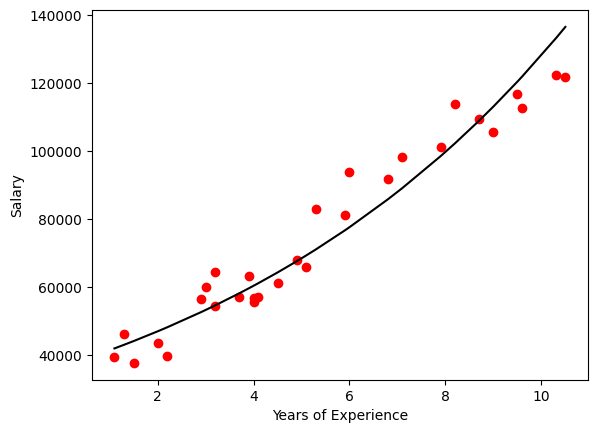

In [18]:
plt.scatter(data['YearsExperience'], data['Salary'], color = 'red')
plt.plot(data['YearsExperience'], np.exp(pred3), color = 'black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

### Quadratic Log model

#### Adding a new column with the squared values of the YearsExperience column

In [19]:
data['YearsExperience_sq'] = data.YearsExperience * data.YearsExperience
data

,YearsExperience,Salary,YearsExperience_sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [20]:
model_quad = smf.ols('np.log(Salary)~YearsExperience+YearsExperience_sq', data = data).fit()

In [21]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           3.95e-18
Time:                        12:38:47   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

------------------
**Almost same performance as the model 1. R-squared value is 0.949**

In [22]:
pred4 = np.exp(model_quad.predict(data))
rmse4 = np.sqrt(mean_squared_error(data['Salary'], pred4))
rmse4

5391.081582693624

Text(0, 0.5, 'Salary')

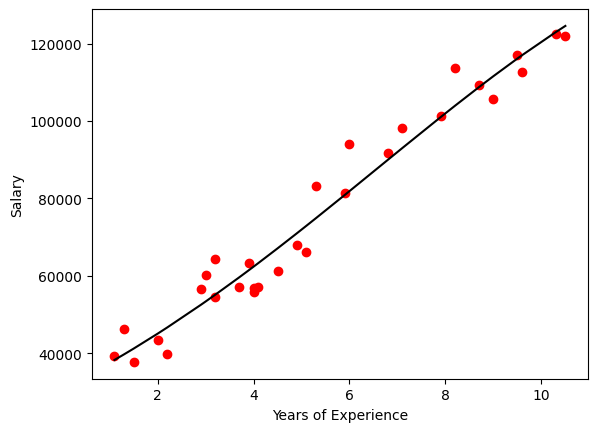

In [23]:
plt.scatter(data['YearsExperience'], data['Salary'], color = 'red')
plt.plot(data['YearsExperience'], pred4, color = 'black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

(array([1., 3., 3., 5., 3., 7., 1., 2., 2., 3.]),
 array([-1.80253896, -1.44129045, -1.08004195, -0.71879344, -0.35754493,
         0.00370357,  0.36495208,  0.72620059,  1.08744909,  1.4486976 ,
         1.8099461 ]),
 <BarContainer object of 10 artists>)

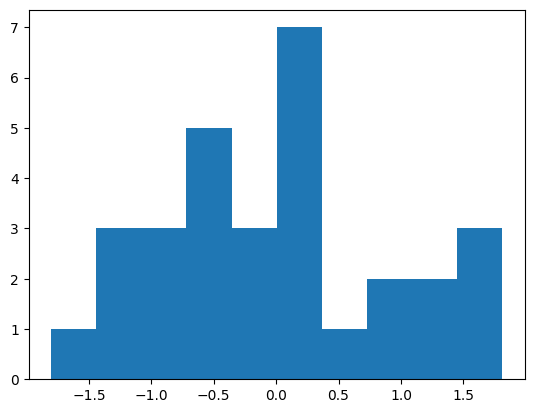

In [24]:
plt.hist(model_quad.resid_pearson)

(array([2., 1., 4., 6., 3., 3., 5., 2., 1., 3.]),
 array([-1.9356925 , -1.5477367 , -1.15978089, -0.77182509, -0.38386929,
         0.00408651,  0.39204231,  0.77999811,  1.16795392,  1.55590972,
         1.94386552]),
 <BarContainer object of 10 artists>)

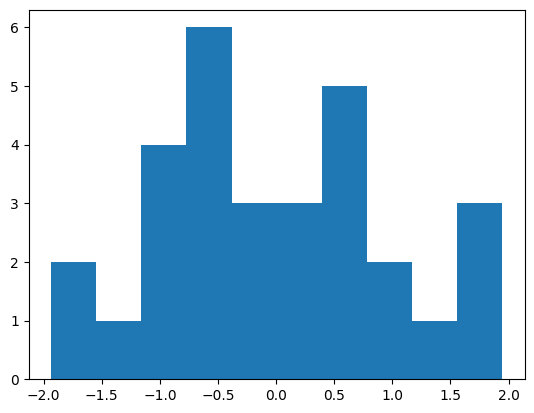

In [25]:
plt.hist(model3.resid_pearson)

In [26]:
np.mean(model_quad.resid_pearson)

2.87214696470528e-14

(array([6., 2., 4., 3., 6., 2., 1., 2., 2., 2.]),
 array([-1.37484017, -1.03957794, -0.70431572, -0.36905349, -0.03379126,
         0.30147096,  0.63673319,  0.97199542,  1.30725764,  1.64251987,
         1.9777821 ]),
 <BarContainer object of 10 artists>)

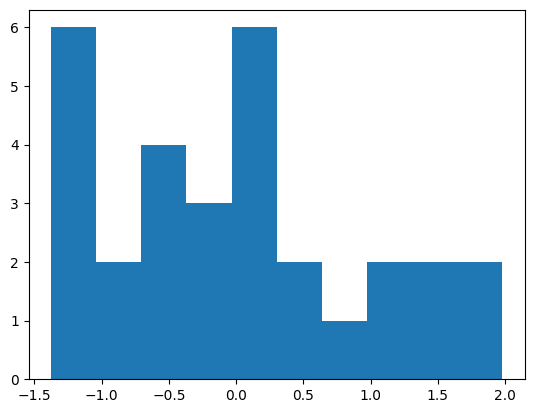

In [27]:
plt.hist(model.resid_pearson)

In [28]:
np.mean(model.resid_pearson)

-2.5831189039611974e-15

### Sqrt log model

In [29]:
data['YearsExperience_sqrt'] = np.sqrt(data.YearsExperience)
data

,YearsExperience,Salary,YearsExperience_sq,YearsExperience_sqrt
0,1.1,39343.0,1.21,1.048809
1,1.3,46205.0,1.69,1.140175
2,1.5,37731.0,2.25,1.224745
3,2.0,43525.0,4.00,1.414214
4,2.2,39891.0,4.84,1.483240
5,2.9,56642.0,8.41,1.702939
6,3.0,60150.0,9.00,1.732051
7,3.2,54445.0,10.24,1.788854
8,3.2,64445.0,10.24,1.788854
9,3.7,57189.0,13.69,1.923538


In [30]:
model_sqrt = smf.ols('np.log(Salary)~YearsExperience+YearsExperience_sqrt', data = data).fit()

In [31]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     228.2
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.22e-17
Time:                        12:39:56   Log-Likelihood:                 31.141
No. Observations:                  30   AIC:                            -56.28
Df Residuals:                      27   BIC:                            -52.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.0415      0.195     51.422      0.000       9.641      10.442
YearsExperience          0.0256      0.042      0.615      0.544      -0.060       0.111
YearsExperience_sqrt     0.4493      0.185      2.426      0.022       0.069       0.829
==============================================================================
Omnibus:                        1.446   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                1.102
Skew:                           0.222   Prob(JB):                        0.576
Kurtosis:                       2.172   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

------------------
**This model has crossed the target r-squared value. The new value is 0.944**

In [32]:
pred5 = np.exp(model_sqrt.predict(data))
rmse5 = np.sqrt(mean_squared_error(data['Salary'], pred5))
rmse5

5880.644517070903

Text(0, 0.5, 'Salary')

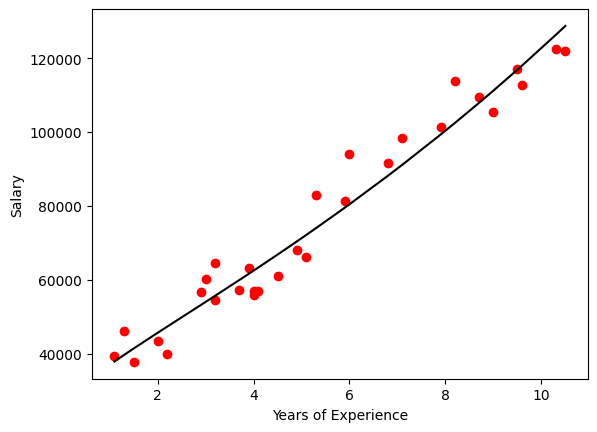

In [34]:
plt.scatter(data['YearsExperience'], data['Salary'], color = 'red')
plt.plot(data['YearsExperience'], pred5, color = 'black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

(array([1., 1., 5., 5., 3., 4., 3., 2., 3., 3.]),
 array([-1.88463719, -1.52459282, -1.16454845, -0.80450409, -0.44445972,
        -0.08441535,  0.27562902,  0.63567339,  0.99571776,  1.35576213,
         1.71580649]),
 <BarContainer object of 10 artists>)

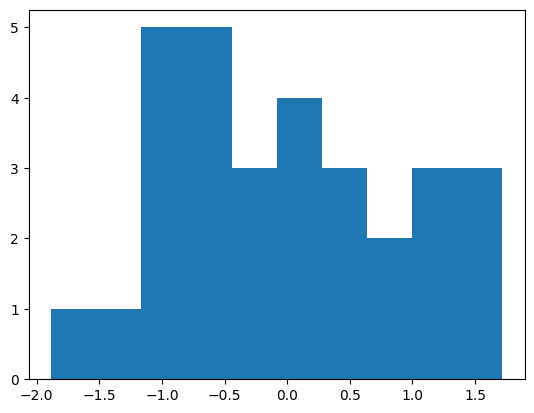

In [35]:
plt.hist(model_sqrt.resid_pearson)

In [36]:
np.mean(model_sqrt.resid_pearson)

2.4935609133081015e-14

### Cbrt log model

In [37]:
data['YearsExperience_cbrt'] = np.cbrt(data.YearsExperience)
data

,YearsExperience,Salary,YearsExperience_sq,YearsExperience_sqrt,YearsExperience_cbrt
0,1.1,39343.0,1.21,1.048809,1.032280
1,1.3,46205.0,1.69,1.140175,1.091393
2,1.5,37731.0,2.25,1.224745,1.144714
3,2.0,43525.0,4.00,1.414214,1.259921
4,2.2,39891.0,4.84,1.483240,1.300591
5,2.9,56642.0,8.41,1.702939,1.426043
6,3.0,60150.0,9.00,1.732051,1.442250
7,3.2,54445.0,10.24,1.788854,1.473613
8,3.2,64445.0,10.24,1.788854,1.473613
9,3.7,57189.0,13.69,1.923538,1.546680


In [38]:
model_cbrt = smf.ols('np.log(Salary)~YearsExperience+YearsExperience_cbrt', data = data).fit()

In [39]:
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     225.7
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           1.40e-17
Time:                        12:41:56   Log-Likelihood:                 30.984
No. Observations:                  30   AIC:                            -55.97
Df Residuals:                      27   BIC:                            -51.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.8422      0.285     34.565      0.000       9.258      10.426
YearsExperience          0.0546      0.031      1.782      0.086      -0.008       0.118
YearsExperience_cbrt     0.6181      0.262      2.355      0.026       0.079       1.157
==============================================================================
Omnibus:                        1.465   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.481   Jarque-Bera (JB):                1.104
Skew:                           0.217   Prob(JB):                        0.576
Kurtosis:                       2.167   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

------------------
**This model has crossed the target r-squared value. The value is 0.944. Not much difference from the previous models**

In [40]:
pred6 = np.exp(model_cbrt.predict(data))
rmse6 = np.sqrt(mean_squared_error(data['Salary'], pred6))
rmse6

5946.671096534367

Text(0, 0.5, 'Salary')

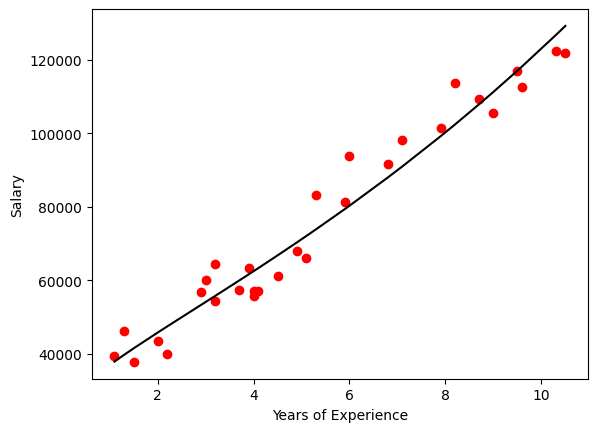

In [41]:
plt.scatter(data['YearsExperience'], data['Salary'], color = 'red')
plt.plot(data['YearsExperience'], pred6, color = 'black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

(array([1., 1., 5., 5., 3., 4., 3., 2., 3., 3.]),
 array([-1.89842836, -1.53542038, -1.1724124 , -0.80940441, -0.44639643,
        -0.08338845,  0.27961953,  0.64262752,  1.0056355 ,  1.36864348,
         1.73165146]),
 <BarContainer object of 10 artists>)

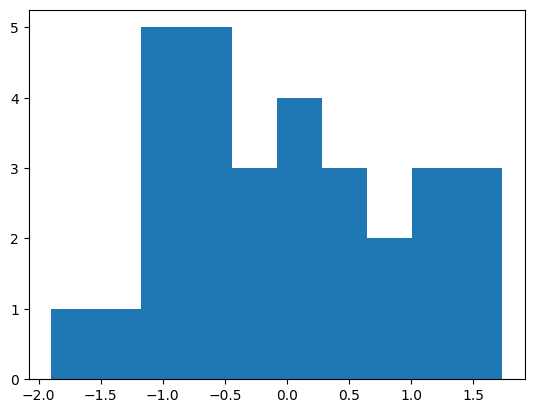

In [42]:
plt.hist(model_cbrt.resid_pearson)

In [43]:
np.mean(model_cbrt.resid_pearson)

2.2818783899462384e-14

### Cbrt plus Sqrt log model

In [44]:
model_cbrt_sqrt = smf.ols('np.log(Salary)~YearsExperience+YearsExperience_sqrt+YearsExperience_cbrt', data = data).fit()

In [45]:
model_cbrt_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     168.3
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           3.82e-17
Time:                        12:43:14   Log-Likelihood:                 33.110
No. Observations:                  30   AIC:                            -58.22
Df Residuals:                      26   BIC:                            -52.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               15.1388      2.676      5.658      0.000       9.639      20.639
YearsExperience         -0.6168      0.339     -1.821      0.080      -1.313       0.079
YearsExperience_sqrt    11.0375      5.547      1.990      0.057      -0.365      22.440
YearsExperience_cbrt   -14.9386      7.823     -1.910      0.067     -31.018       1.141
==============================================================================
Omnibus:                        1.555   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.434
Skew:                           0.434   Prob(JB):                        0.488
Kurtosis:                       2.374   Cond. No.                     4.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

------------------
**This model has crossed the target r-squared value. The new value is 0.951. This is the highest so far**

In [46]:
pred7 = np.exp(model_cbrt_sqrt.predict(data))
rmse7 = np.sqrt(mean_squared_error(data['Salary'], pred7))
rmse7

5191.27245358687

Text(0, 0.5, 'Salary')

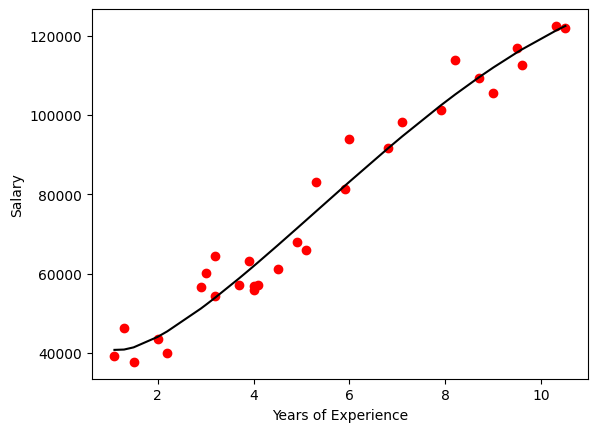

In [47]:
plt.scatter(data['YearsExperience'], data['Salary'], color = 'red')
plt.plot(data['YearsExperience'], pred7, color = 'black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

(array([3., 4., 2., 6., 6., 2., 1., 2., 3., 1.]),
 array([-1.50781021, -1.15051679, -0.79322338, -0.43592997, -0.07863655,
         0.27865686,  0.63595028,  0.99324369,  1.3505371 ,  1.70783052,
         2.06512393]),
 <BarContainer object of 10 artists>)

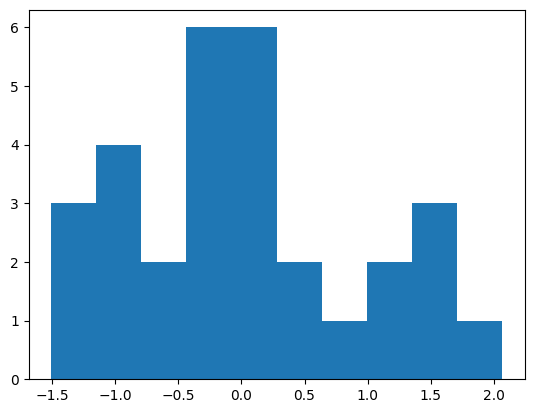

In [48]:
plt.hist(model_cbrt_sqrt.resid_pearson)

In [49]:
np.mean(model_cbrt_sqrt.resid_pearson)

1.6712302837914213e-12

--------------

The model with square root and the cube root of the sorting time has the highest r-squared value among all the models.